<h1>Is the preparation course effective?</h1>

The data in this dataset shows the results of test scores of students in different subjects. 

What I would like to test is if the test preparation course affected their results. Does the test preparation course result in higher performance? If so, would a test preparation course help those did not take test preparation courses and scored below average? 

In this experiment, I will be comparing those who completed the test preparation course against those who had no test preparation course. 

Initially, I want to compare the test score results of each subject to test preparation course, and from there, I would like to dig deeper in to the results to see if any other factors were significant in the test scores. 

Afterwards, I would like to run further tests from the results to see how we can improve test scores. 


In [140]:
#import libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [141]:
#import dataframe

df = pd.read_csv('/Users/genta/Desktop/Thinkful/students-performance-in-exams/StudentsPerformance.csv')

In [142]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


I want to look at some general information about the data before I decide how to move forward with how I am going to do comparisons and analysis. 

In [143]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From doing a describe command, I now have the mean, max, and min results for each test score area. I will use this information to decide what is above or below average

I have decided to use the means of each to set the above/below marks.

In [144]:
#Setting up the averages to use for each subject. 

#Math Avg
mabovebelow = 66

#Reading Avg
rabovebelow = 69

#Writing Avg
wabovebelow = 68

Now that I have my average numbers, I will use that to see who were above or below the average among test score preparation. However, before I do that, I need to setup some dataframes to analyze. I will set up a above/below dataframe for math, reading, and writing.

Once I have those dataframes I want to look at the results of each among test score preparation.

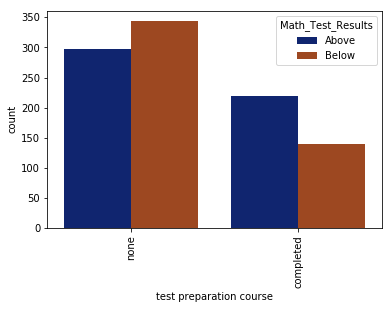

In [145]:
#Math Score Dataframe
df['Math_Test_Results'] = np.where(df['math score']<mabovebelow, 'Below', 'Above')

#Math Test Prep
p = sns.countplot(x='test preparation course', data = df, hue='Math_Test_Results', palette='dark')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

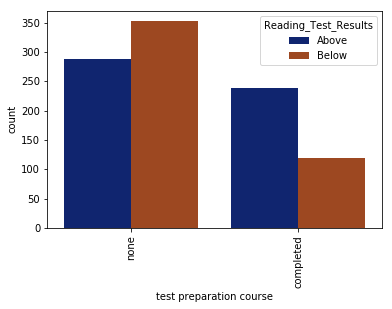

In [146]:
#Reading Score Dataframe
df['Reading_Test_Results'] = np.where(df['reading score']<rabovebelow, 'Below', 'Above')

#Reading Test Prep
p = sns.countplot(x='test preparation course', data = df, hue='Reading_Test_Results', palette='dark')
_ = plt.setp(p.get_xticklabels(), rotation=90) 


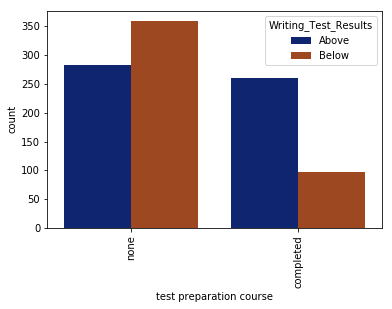

In [147]:
#Writing Score Dataframe
df['Writing_Test_Results'] = np.where(df['writing score']<wabovebelow, 'Below', 'Above')

#Writing Test Prep
p = sns.countplot(x='test preparation course', data = df, hue='Writing_Test_Results', palette='dark')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Looking at the results of each, in general, I saw that when a student completed the test preparation courses, they were more likely to score above average, and when they did not take the test preparation courses, they were more likely to score below the average.

From these results, I would like to perform an A/B test to see if the test preparation course can improve test results. 

I would like to test the group of students who did not take test preparation courses. In that group, I would like to create two test groups and compare the results and using a t-test to test the significance of those results.

<h4>Goal:</h4> Improve test scores in each subject for those who did not take preparation courses. 

<h4>Hypotheses:</h4>
I am hoping and hypothesizing that test preparation courses will improve test scores, however, my official hypotheses are not that. What I am testing is the affect on test scores in hope of improving them.

H0: Test preparation courses will not affect test scores.

H1: Test preparation courses will affect test scores.



<h4>Test Groups</h4>
In these test groups the only change will be in preparation. I do not want to alter the state of any other factor, also I want to do the test on the next available round of math, reading, and writing tests, or as soon as possible. The reason for this is, I do not want the other factors to change or change much among the groups. 

Control group: Original group of people who did not take the test preparation course

Variant group: Same group, but give them test preparation help. WIth this, we would offer the test to those who did not take the courses before. Of those that decide to take the courses, I will compare their results to previous results. 


<h4>T-test standards</h4>
I will set my p-value or judgment at 0.5. 

After the test is run, and if I see an increase in the above average test scores, I will perform a t-test to further analyze these results. If, when comparing the results, if the results are above 0.5 then test prep does not test results and I accept H0. If the results are below 0.5 then test prep has an affect on test results and I accept H1. 

I know that in doing these tests, there is a possibility that the test preparation will have a negative effect on test scores. If this does happen, t-tests will still be performed to see if it is signficant. 